In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importando o dataframe e separando a variável resposta das variáveis explicativas
df = pd.read_csv('dados.csv')
df.columns

Index(['sexo', 'posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos',
       'tipo_renda', 'educacao', 'estado_civil', 'tipo_residencia', 'idade',
       'tempo_emprego', 'possui_celular', 'possui_fone_comercial',
       'possui_fone', 'possui_email', 'qt_pessoas_residencia', 'mau'],
      dtype='object')

### Distribuição de dados
Quantos maus pagadores existem na base? Vamos visualizar as categorias em  barras.

False    16260
True       390
Name: mau, dtype: int64

Taxa de inadimplentes:
0.023423423423423424


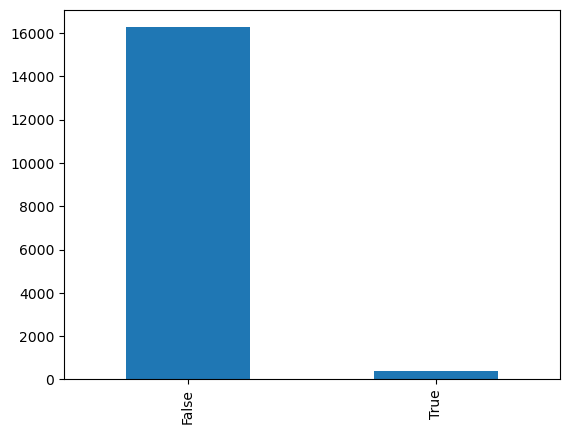

In [3]:
grafico_barras = df['mau'].value_counts().plot.bar()

print(df['mau'].value_counts())
print("\nTaxa de inadimplentes:")
print(df['mau'].mean())

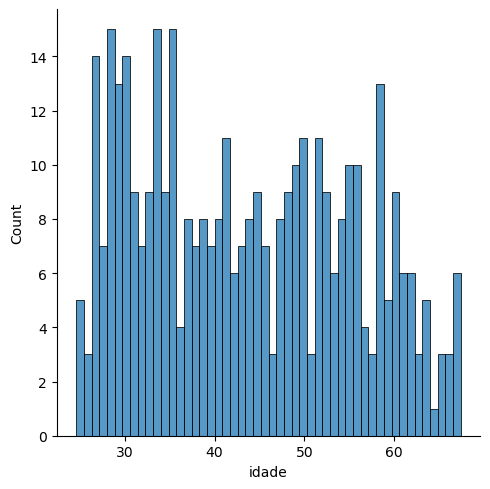

In [4]:
# Dentre os maus pagadores, qual a idade que mais aparece?
df_mau = df.loc[df.mau == True]
var = "idade"
sns.displot(df_mau, x = var, bins = 50)
plt.show();

<Figure size 640x480 with 0 Axes>

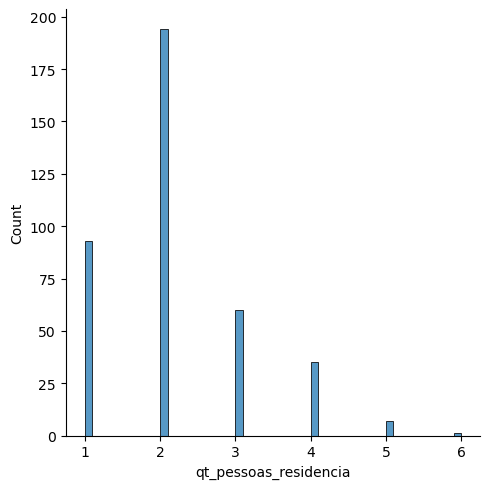

In [5]:
# Dentre os maus pagadores, quantas pessoas moram na mesma residência?
plt.clf();
var = "qt_pessoas_residencia"

df_mau.loc[df_mau[var]<0,var] = -2

sns.displot(df_mau, x = var, bins = 50)
plt.show();

### Preparando dados
Construindo metadados

In [6]:
unique_counts = df.apply(pd.Series.nunique).tolist()
categories = df.columns.tolist()
data_type = df.dtypes.tolist()

to_df = list(zip(categories, data_type, unique_counts))
metadados = pd.DataFrame(to_df, columns=['variavel','tipo','qtd_categorias']).set_index('variavel')
metadados

,tipo,qtd_categorias
variavel,,
sexo,object,2
posse_de_veiculo,object,2
posse_de_imovel,object,2
qtd_filhos,int64,8
tipo_renda,object,5
educacao,object,5
estado_civil,object,5
tipo_residencia,object,6
idade,float64,5298


In [7]:
# Convertendo dummies
def convert_dummy(df, feature,rank=0):
    pos = pd.get_dummies(df[feature], prefix=feature)
    mode = df[feature].value_counts().index[rank]
    biggest = feature + '_' + str(mode)
    pos.drop([biggest],axis=1,inplace=True)
    df.drop([feature],axis=1,inplace=True)
    df=df.join(pos)
    return df

In [8]:
for var in metadados[metadados['tipo'] == 'object'].index:
    df = convert_dummy(df, var)

df.head()

,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau,sexo_M,...,educacao_Lower secondary,estado_civil_Civil marriage,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_Co-op apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,58.832877,3.106849,1,0,0,0,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
1,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
2,0,52.356164,8.358904,1,0,1,1,1.0,False,0,...,0,0,0,1,0,0,0,0,0,0
3,0,46.224658,2.106849,1,1,1,1,2.0,False,1,...,0,0,0,0,0,0,0,0,0,0
4,0,29.230137,3.021918,1,0,0,0,2.0,False,0,...,0,0,0,0,0,0,0,0,0,0


### Modelagem de dados

#### Treino e teste

In [9]:
# Tirando a variável resposta da base de treinamento
x = df.drop("mau",axis = 1)
y = df["mau"]

# Tirando ID da base de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x, y)

#### Rodando o modelo

In [10]:
# Treinar uma Random Forest com 5 árvores

clf = RandomForestClassifier(n_estimators=3)
clf = clf.fit(x_train,y_train)

In [11]:
# Calculando a acuracia

y_pred = clf.predict(x_test)
acc = accuracy_score(y_test, y_pred)
print('Acurácia: {0:.2f}%'.format(acc*100))

Acurácia: 97.07%


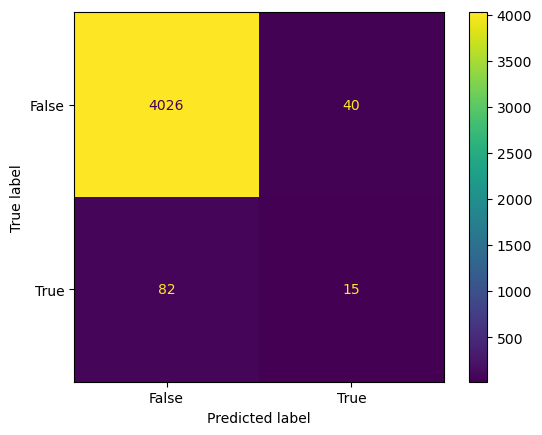

In [12]:
# Visualizando a matriz de confusão
plot_confusion_matrix(clf, x_test, y_test);

### Avaliação

Como um exemplo simples, considere que um cliente bom pagador deixa (em média) 5 '*dinheiros*' de lucro, e um mau pagador deixa (em média) 100 '*dinheiros*' de prejuízo.

de acordo com a matriz de confusão:

| Decisão   | lucro dos bons    | lucro dos maus | total  |
| --------- |:-----------------:|:--------------:| ------:|
| Aprovador | 4026 x 5          | 40 x (-100)    | 16.130 |
| Reprovar  |  82 x 5           | 15 x (-100)    | -1.075 |

Estariamos evitando, portanto, um prejuízo de -1.075 '*dinheiros*' - o que na prática significa um aumento no lucro.